In [288]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.layers import Dense
from keras.models import Sequential

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [337]:
df=pd.read_csv("fake_job_postings.csv")
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [338]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [340]:
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

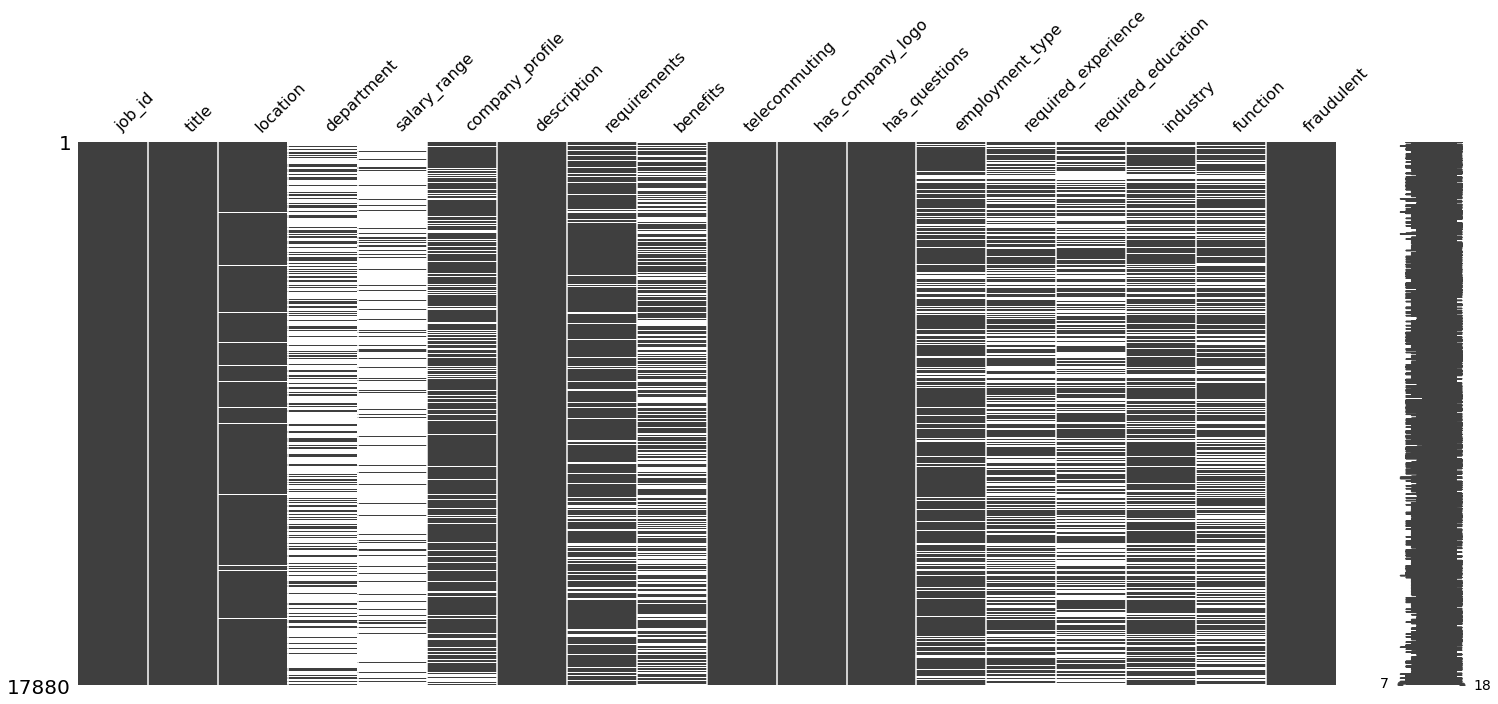

In [341]:
import missingno as msno
msno.matrix(df)

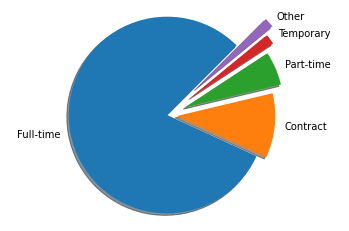

In [342]:
labels = ['Full-time','Contract','Part-time','Temporary','Other']
sizes =[df['employment_type'].value_counts()[x] for x in range(5)]
explode = (0,0.1,0.2,0.3,0.4)

#plot
plt.pie(sizes,labels=labels,explode=explode,
       shadow=True,startangle=45)
plt.axis('equal')
plt.show()

In [343]:
split_location=df["location"].apply(lambda x:str(x).strip().split(','))
split_location=split_location.apply(pd.Series)
split_location[~(split_location[4].isnull())]
df['country']=split_location[0]
# Map alpha 2 to corresponding alpha 3 country code
country_code_mapping = {"BD": "BGD", "BE": "BEL", "BF": "BFA", "BG": "BGR", "BA": "BIH", "BB": "BRB", "WF": "WLF", "BL": "BLM", "BM": "BMU", "BN": "BRN", "BO": "BOL", "BH": "BHR", "BI": "BDI", "BJ": "BEN", "BT": "BTN", "JM": "JAM", "BV": "BVT", "BW": "BWA", "WS": "WSM", "BQ": "BES", "BR": "BRA", "BS": "BHS", "JE": "JEY", "BY": "BLR", "BZ": "BLZ", "RU": "RUS", "RW": "RWA", "RS": "SRB", "TL": "TLS", "RE": "REU", "TM": "TKM", "TJ": "TJK", "RO": "ROU", "TK": "TKL", "GW": "GNB", "GU": "GUM", "GT": "GTM", "GS": "SGS", "GR": "GRC", "GQ": "GNQ", "GP": "GLP", "JP": "JPN", "GY": "GUY", "GG": "GGY", "GF": "GUF", "GE": "GEO", "GD": "GRD", "GB": "GBR", "GA": "GAB", "SV": "SLV", "GN": "GIN", "GM": "GMB", "GL": "GRL", "GI": "GIB", "GH": "GHA", "OM": "OMN", "TN": "TUN", "JO": "JOR", "HR": "HRV", "HT": "HTI", "HU": "HUN", "HK": "HKG", "HN": "HND", "HM": "HMD", "VE": "VEN", "PR": "PRI", "PS": "PSE", "PW": "PLW", "PT": "PRT", "SJ": "SJM", "PY": "PRY", "IQ": "IRQ", "PA": "PAN", "PF": "PYF", "PG": "PNG", "PE": "PER", "PK": "PAK", "PH": "PHL", "PN": "PCN", "PL": "POL", "PM": "SPM", "ZM": "ZMB", "EH": "ESH", "EE": "EST", "EG": "EGY", "ZA": "ZAF", "EC": "ECU", "IT": "ITA", "VN": "VNM", "SB": "SLB", "ET": "ETH", "SO": "SOM", "ZW": "ZWE", "SA": "SAU", "ES": "ESP", "ER": "ERI", "ME": "MNE", "MD": "MDA", "MG": "MDG", "MF": "MAF", "MA": "MAR", "MC": "MCO", "UZ": "UZB", "MM": "MMR", "ML": "MLI", "MO": "MAC", "MN": "MNG", "MH": "MHL", "MK": "MKD", "MU": "MUS", "MT": "MLT", "MW": "MWI", "MV": "MDV", "MQ": "MTQ", "MP": "MNP", "MS": "MSR", "MR": "MRT", "IM": "IMN", "UG": "UGA", "TZ": "TZA", "MY": "MYS", "MX": "MEX", "IL": "ISR", "FR": "FRA", "IO": "IOT", "SH": "SHN", "FI": "FIN", "FJ": "FJI", "FK": "FLK", "FM": "FSM", "FO": "FRO", "NI": "NIC", "NL": "NLD", "NO": "NOR", "NA": "NAM", "VU": "VUT", "NC": "NCL", "NE": "NER", "NF": "NFK", "NG": "NGA", "NZ": "NZL", "NP": "NPL", "NR": "NRU", "NU": "NIU", "CK": "COK", "XK": "XKX", "CI": "CIV", "CH": "CHE", "CO": "COL", "CN": "CHN", "CM": "CMR", "CL": "CHL", "CC": "CCK", "CA": "CAN", "CG": "COG", "CF": "CAF", "CD": "COD", "CZ": "CZE", "CY": "CYP", "CX": "CXR", "CR": "CRI", "CW": "CUW", "CV": "CPV", "CU": "CUB", "SZ": "SWZ", "SY": "SYR", "SX": "SXM", "KG": "KGZ", "KE": "KEN", "SS": "SSD", "SR": "SUR", "KI": "KIR", "KH": "KHM", "KN": "KNA", "KM": "COM", "ST": "STP", "SK": "SVK", "KR": "KOR", "SI": "SVN", "KP": "PRK", "KW": "KWT", "SN": "SEN", "SM": "SMR", "SL": "SLE", "SC": "SYC", "KZ": "KAZ", "KY": "CYM", "SG": "SGP", "SE": "SWE", "SD": "SDN", "DO": "DOM", "DM": "DMA", "DJ": "DJI", "DK": "DNK", "VG": "VGB", "DE": "DEU", "YE": "YEM", "DZ": "DZA", "US": "USA", "UY": "URY", "YT": "MYT", "UM": "UMI", "LB": "LBN", "LC": "LCA", "LA": "LAO", "TV": "TUV", "TW": "TWN", "TT": "TTO", "TR": "TUR", "LK": "LKA", "LI": "LIE", "LV": "LVA", "TO": "TON", "LT": "LTU", "LU": "LUX", "LR": "LBR", "LS": "LSO", "TH": "THA", "TF": "ATF", "TG": "TGO", "TD": "TCD", "TC": "TCA", "LY": "LBY", "VA": "VAT", "VC": "VCT", "AE": "ARE", "AD": "AND", "AG": "ATG", "AF": "AFG", "AI": "AIA", "VI": "VIR", "IS": "ISL", "IR": "IRN", "AM": "ARM", "AL": "ALB", "AO": "AGO", "AQ": "ATA", "AS": "ASM", "AR": "ARG", "AU": "AUS", "AT": "AUT", "AW": "ABW", "IN": "IND", "AX": "ALA", "AZ": "AZE", "IE": "IRL", "ID": "IDN", "UA": "UKR", "QA": "QAT", "MZ": "MOZ"}

In [344]:
df['country']=df['country'].apply(lambda x:country_code_mapping[x] if x!='nan' else 'nan')

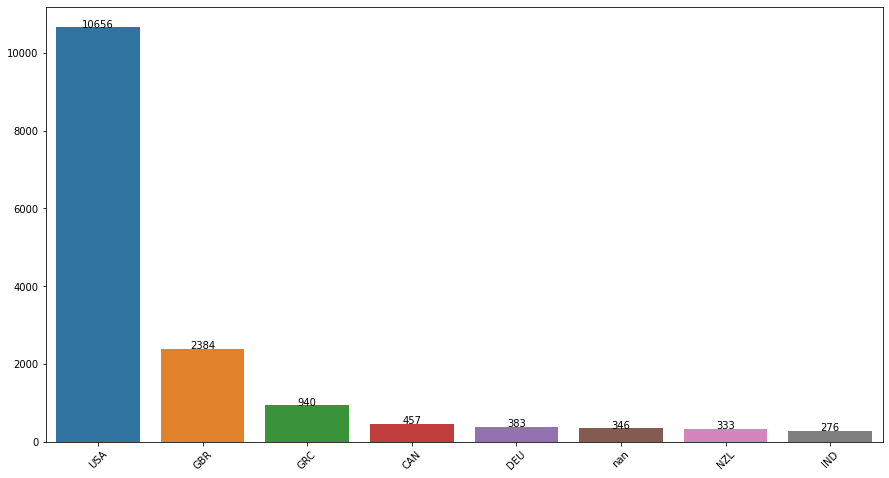

In [345]:
labels=df.country.value_counts().index[:8]
values=df.country.value_counts().values[:8]
plt.figure(figsize = (15, 8))

ax = sns.barplot(x=labels, y=values)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.9, values[i],ha="center")

In [298]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Choropleth(
    locations = df['country'].value_counts().index,
    z = df['country'].value_counts().values,
    text = df['country'].value_counts().index,
    colorscale = 'Blues',
    autocolorscale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'job ads',
))

fig.update_layout(
    title_text='Total job ads',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),

)
fig.show()

In [299]:
from collections import OrderedDict
fraud_list=df[df['fraudulent']==1]['country'].value_counts().to_dict()
total_count_list=df['country'].value_counts().to_dict()
percent_fraud_dict={}
for country in total_count_list.keys():
    if country in fraud_list:
        percent_fraud_dict[country]=fraud_list[country]/total_count_list[country]*100
    else:
        percent_fraud_dict[country]=0
percent_fraud_dict=OrderedDict(sorted(percent_fraud_dict.items())) 

In [300]:
fig = go.Figure(data=go.Choropleth(
    locations = list(percent_fraud_dict.keys()),
    z = list(percent_fraud_dict.values()),
    text =  list(percent_fraud_dict.keys()),
    colorscale = 'Reds',
    autocolorscale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Job ads percent',
))

fig.update_layout(
    title_text='Percentage of fraudulent job ads',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),

)

fig.show()

In [301]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,USA
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NZL
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,USA
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,USA
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,USA


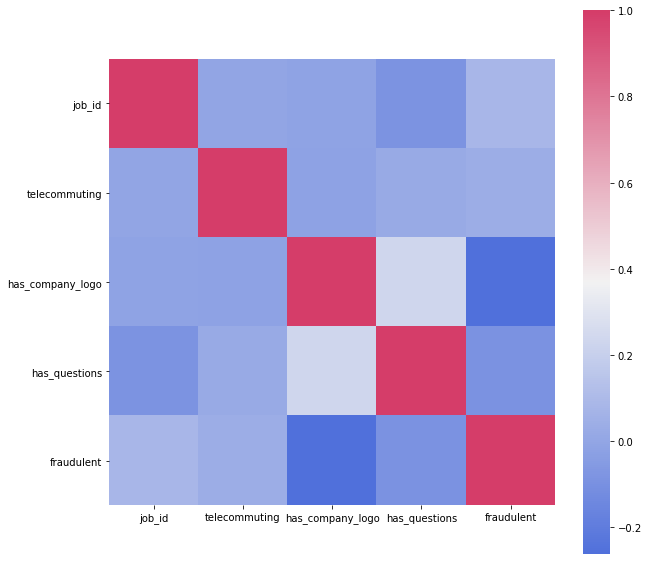

In [302]:
plt.figure(figsize = (10,10))
corr = df.corr()
sns.heatmap(corr , mask=np.zeros_like(corr, dtype=np.bool) , cmap=sns.diverging_palette(-100,0,as_cmap=True) , square = True)

In [303]:
df.fillna(" ",inplace = True)
df['text'] = df['title'] + ' ' + df['location'] + ' ' + df['department'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits'] + ' ' + df['employment_type'] + ' ' + df['required_education'] + ' ' + df['industry'] + ' ' + df['function'] 

In [304]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,text
0,1,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0,USA,"Marketing Intern US, NY, New York Marketing We..."
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0,NZL,"Customer Service - Cloud Video Production NZ, ..."
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0,USA,"Commissioning Machinery Assistant (CMA) US, IA..."
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,USA,"Account Executive - Washington DC US, DC, Wash..."
4,5,Bill Review Manager,"US, FL, Fort Worth",,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,USA,"Bill Review Manager US, FL, Fort Worth SpotS..."


In [305]:
df.text[0]

"Marketing Intern US, NY, New York Marketing We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food communi

In [306]:
del df['title']
del df['location']
del df['department']
del df['company_profile']
del df['description']
del df['requirements']
del df['benefits']
del df['employment_type']
del df['required_experience']
del df['required_education']
del df['industry']
del df['function']
del df['salary_range']
del df['job_id']
del df['country']

In [307]:
df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,text
0,0,1,0,0,"Marketing Intern US, NY, New York Marketing We..."
1,0,1,0,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,1,0,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,1,0,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,1,1,0,"Bill Review Manager US, FL, Fort Worth SpotS..."


In [308]:
# removing duplicates
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)
# converting text to lower case
df.text = df.text.apply(lambda x: x.lower())
# removing stop works and punctuations
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['text']=df.text.str.replace(r'\W',' ',regex=True)
df['text']=df.text.str.replace(r'\b\d+','',regex=True)
df['text']=df.text.str.replace(r'\S{20,}',' ',regex=True)
df['text']=df.text.str.replace(r'\s{2,}',' ',regex=True)
df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,text
0,0,1,0,0,marketing intern us ny new york marketing we r...
1,0,1,0,0,customer service cloud video production nz auc...
2,0,1,0,0,commissioning machinery assistant cma us ia we...
3,0,1,0,0,account executive washington dc us dc washingt...
4,0,1,1,0,bill review manager us fl fort worth spotsourc...


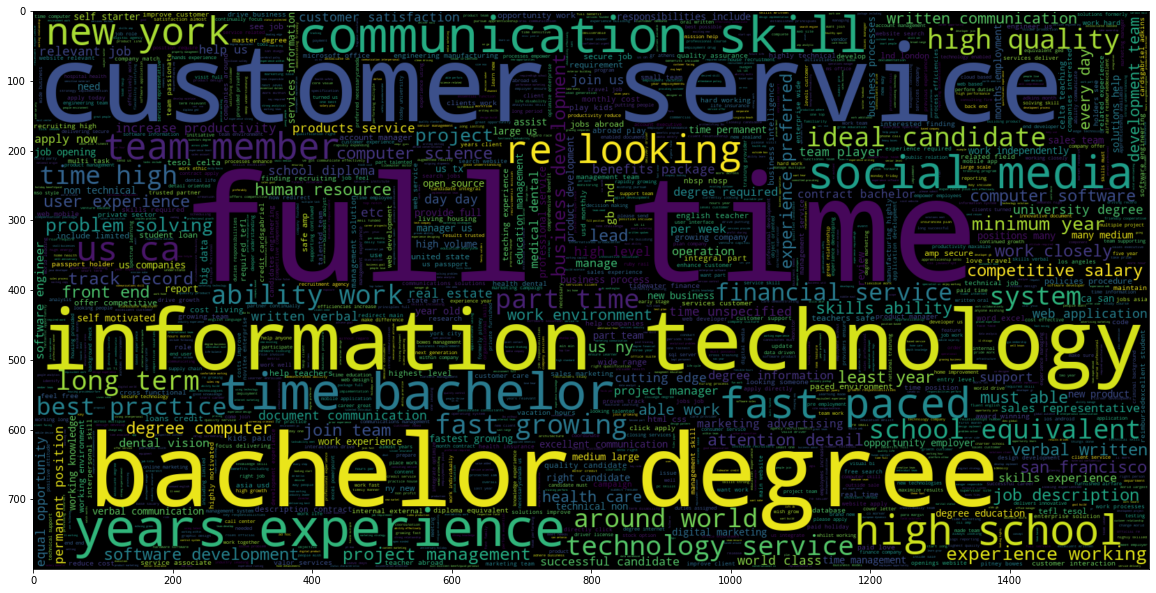

In [309]:
# Text that is not fraudulent(0)
plt.figure(figsize = (20,20)) 
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df[df.fraudulent == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

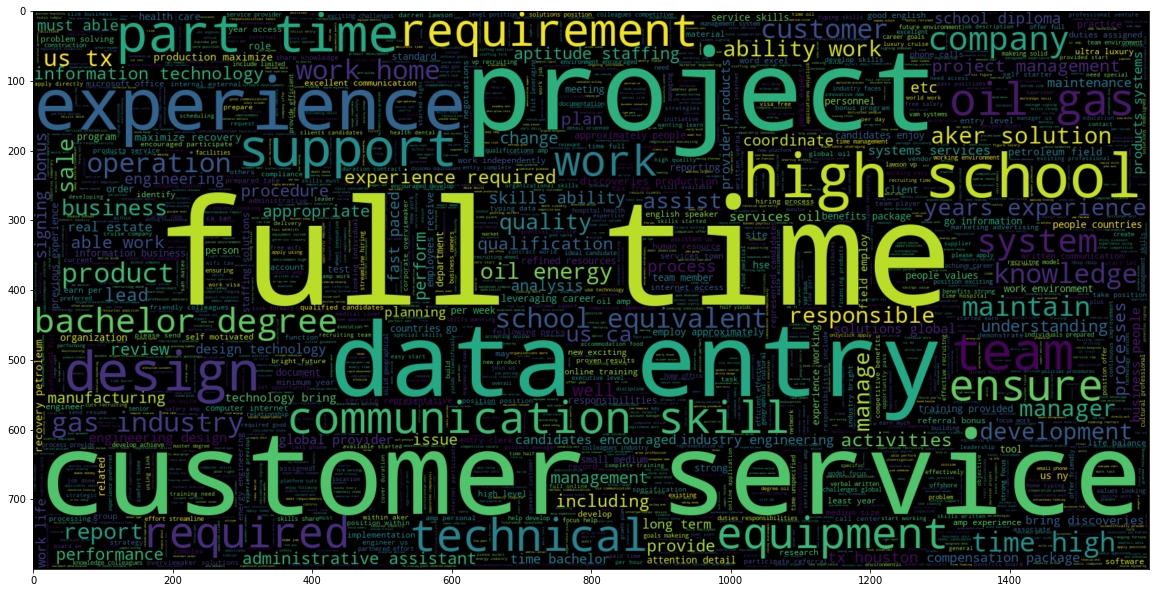

In [310]:
# Text that is fraudulent(1)
plt.figure(figsize = (20,20)) 
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df[df.fraudulent == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

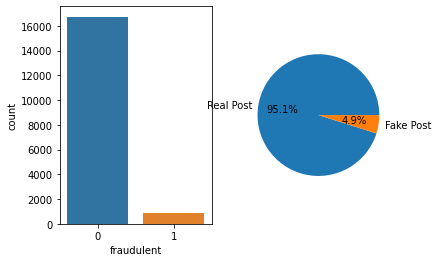

In [311]:
#sns.countplot(x = "fraudulent" , data = df)
fig, ax = plt.subplots(1, 2)

sns.countplot(x='fraudulent', data=df, ax=ax[0])
ax[1].pie(df['fraudulent'].value_counts(), labels=['Real Post', 'Fake Post'], autopct='%1.1f%%')
plt.show()

Random over-sampling:


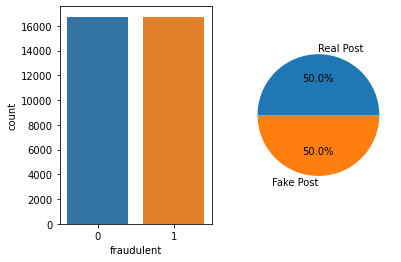

In [312]:
df_class_1 = df[df.fraudulent == 1]
df_class_0 = df[df.fraudulent == 0]
count_class_0, count_class_1 = df.fraudulent.value_counts()
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over_sample = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
#sns.countplot(x = "fraudulent" , data = df_over_sample)
fig, ax = plt.subplots(1, 2)
sns.countplot(x='fraudulent', data=df_over_sample, ax=ax[0])
ax[1].pie(df_over_sample['fraudulent'].value_counts(), labels=['Real Post', 'Fake Post'], autopct='%1.1f%%')
plt.show()

# **Models**

In [318]:
#split it into training and test sets
x_train, x_test, y_train, y_test = train_test_split(df.text, df.fraudulent , test_size = 0.2 , random_state = 0)

#encoding
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

#vectorization
MAX = 400
vectorizer = TfidfVectorizer(max_features = MAX)
vectorizer.fit(x_train)

x_trainvec = vectorizer.transform(x_train)
x_testvec = vectorizer.transform(x_test)

In [330]:
Model_compare=[]
logreg = LogisticRegression()
logreg.fit(x_trainvec, y_train)

# predict
y_pred_lr = logreg.predict(x_testvec)

# accuracy
print("Accuracy Score of LogReg :", accuracy_score(y_pred_lr, y_test)) 
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score", f1_score(y_test, y_pred_lr), "\n")
Model_compare.append(('Logistic Regression', accuracy_score(y_test, y_pred_lr), precision_score(y_test, y_pred_lr), recall_score(y_test, y_pred_lr), f1_score(y_test, y_pred_lr)))
# classifcation report
print("Classification Report of LogReg:\n", classification_report(y_test, y_pred_lr), "\n")

Accuracy Score of LogReg : 0.9658897100625355
Precision: 0.8936170212765957
Recall: 0.267515923566879
F1 Score 0.411764705882353 

Classification Report of LogReg:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3361
           1       0.89      0.27      0.41       157

    accuracy                           0.97      3518
   macro avg       0.93      0.63      0.70      3518
weighted avg       0.96      0.97      0.96      3518
 



In [331]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
knn1 = knn = KNeighborsClassifier(n_neighbors = 1)
knn1.fit(x_trainvec, y_train)

y_pred_knn = knn1.predict(x_testvec)

print("Accuracy Score of KNN :", accuracy_score(y_pred_knn, y_test))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score", f1_score(y_test, y_pred_knn), "\n")
Model_compare.append(('KNN', accuracy_score(y_test, y_pred_knn), precision_score(y_test, y_pred_knn), recall_score(y_test, y_pred_knn), f1_score(y_test, y_pred_knn)))
# classifcation report
print("Classification Report of KNN:\n", classification_report(y_test, y_pred_knn), "\n")


Accuracy Score of KNN : 0.9769755542922115
Precision: 0.7435897435897436
Recall: 0.7388535031847133
F1 Score 0.7412140575079873 

Classification Report of KNN:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3361
           1       0.74      0.74      0.74       157

    accuracy                           0.98      3518
   macro avg       0.87      0.86      0.86      3518
weighted avg       0.98      0.98      0.98      3518
 



In [332]:
from sklearn.svm import SVC

svc = SVC(kernel = 'rbf')
svc.fit(x_trainvec, y_train)

y_pred_svc = svc.predict(x_testvec)

# accuracy
print("Accuracy Score of SVC :", accuracy_score(y_pred_svc, y_test)) 
print("Precision:", precision_score(y_test, y_pred_svc))
print("Recall:", recall_score(y_test, y_pred_svc))
print("F1 Score", f1_score(y_test, y_pred_svc), "\n")
Model_compare.append(('SVC', accuracy_score(y_test, y_pred_svc), precision_score(y_test, y_pred_svc), recall_score(y_test, y_pred_svc), f1_score(y_test, y_pred_svc)))
# classifcation report
print("Classification Report of SVC:\n", classification_report(y_test, y_pred_svc), "\n")

Accuracy Score of SVC : 0.9778283115406481
Precision: 1.0
Recall: 0.5031847133757962
F1 Score 0.6694915254237288 

Classification Report of SVC:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3361
           1       1.00      0.50      0.67       157

    accuracy                           0.98      3518
   macro avg       0.99      0.75      0.83      3518
weighted avg       0.98      0.98      0.97      3518
 



In [333]:
 df = pd.DataFrame(Model_compare, columns=["Model","Accuracy","Precision","Recall","f1-score"])
 df

,Model,Accuracy,Precision,Recall,f1-score
0,Logistic Regression,0.965890,0.893617,0.267516,0.411765
1,KNN,0.976976,0.743590,0.738854,0.741214
2,SVC,0.977828,1.000000,0.503185,0.669492


(0.96, 1.0)

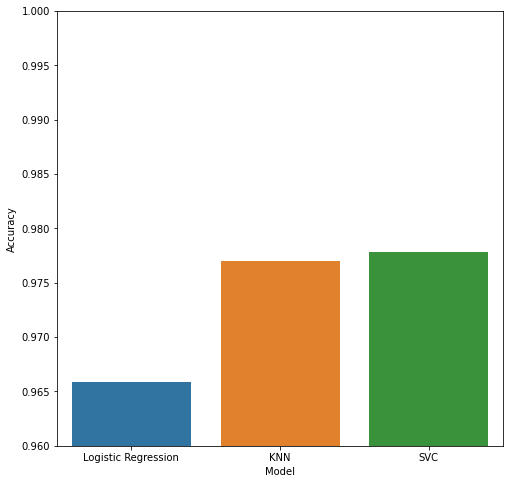

In [336]:
import seaborn as sns
plt.subplots(figsize=(8,8))
sns.barplot(x='Model', y='Accuracy', data=df)
plt.ylim(0.96, 1.0)